In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

LOading the Data

In [63]:
# Read column names from file
#cols = list(pd.read_csv("WineQT.csv", nrows=1))
cols = list(pd.read_csv("winequality-red.csv", nrows=1))
# Use list comprehension to remove the unwanted column in **usecol**
#wine_data=pd.read_csv('WineQT.csv', usecols =[i for i in cols if i != "Id"])
wine_data=pd.read_csv('winequality-red.csv', usecols =[i for i in cols if i != "Id"])

In [64]:
wine_data.shape

(1599, 12)

In [65]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Analysis and Visualization

In [66]:
#check missing values
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [67]:
#statistical measures
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [68]:
wine_data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

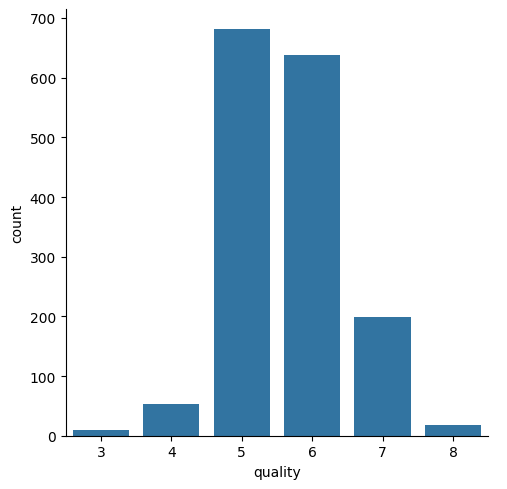

In [69]:
sns.catplot(x='quality', data = wine_data, kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

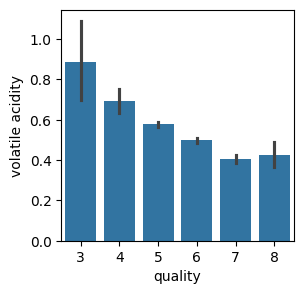

In [70]:
plot = plt.figure(figsize=(3,3))
sns.barplot(x='quality',y='volatile acidity', data = wine_data )

<Axes: xlabel='quality', ylabel='chlorides'>

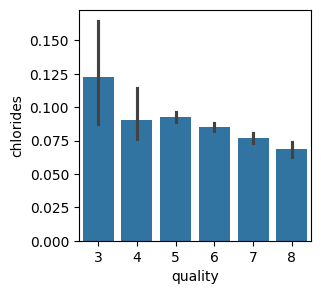

In [71]:
plot = plt.figure(figsize=(3,3))
sns.barplot(x='quality',y='chlorides', data = wine_data )

<Axes: xlabel='quality', ylabel='citric acid'>

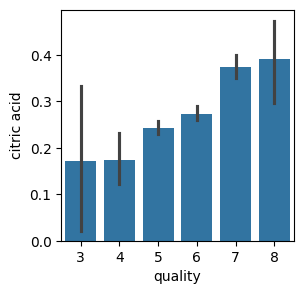

In [72]:
plot = plt.figure(figsize=(3,3))
sns.barplot(x='quality',y='citric acid', data = wine_data )

<Axes: xlabel='quality', ylabel='residual sugar'>

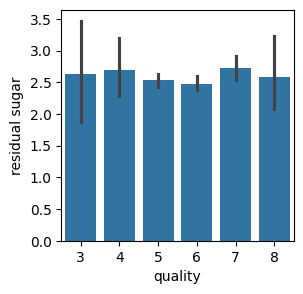

In [73]:
plot = plt.figure(figsize=(3,3))
sns.barplot(x='quality',y='residual sugar', data = wine_data )

<Axes: xlabel='quality', ylabel='density'>

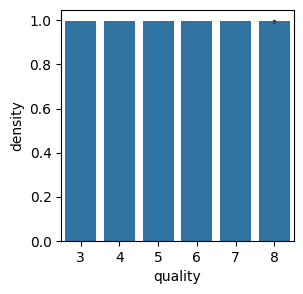

In [74]:
plot = plt.figure(figsize=(3,3))
sns.barplot(x='quality',y='density', data = wine_data )

# Understanding the correlation between the various features in the dataset

1. Positive Correlation
2. Negative Correlation

In [75]:
correlation= wine_data.corr()


<Axes: >

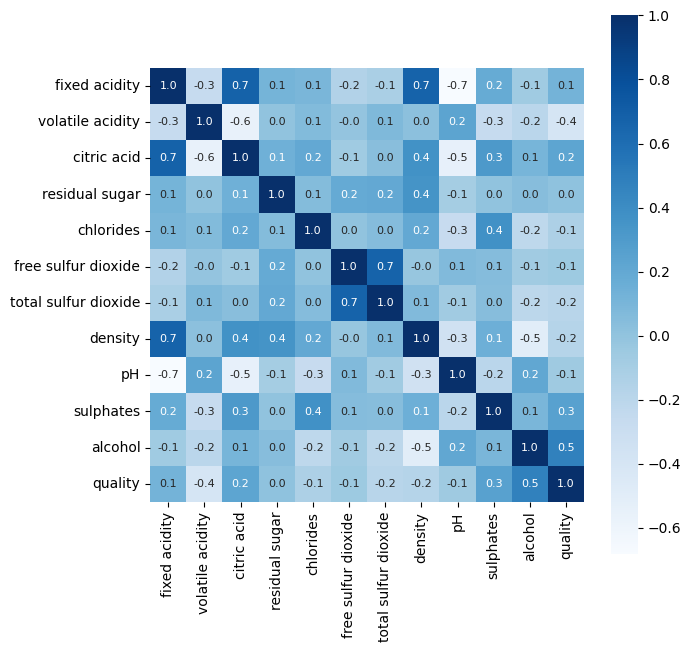

In [76]:
#constructing a heatmap to understand the correlation
plt.figure(figsize=(7,7))
sns.heatmap(correlation, cbar=True, square=  True , fmt='.1f', annot=True, annot_kws={'size':8} ,cmap='Blues' )

# Splitting the data (features) and Target (label)

In [77]:
#Separating Data (Features) and Labels (3-8 )
X=wine_data.drop(columns='quality',axis=1)


# Label Binarization

In [78]:
Y=wine_data['quality'].apply(lambda y_value:1 if y_value >=7 else 0) #label Encoding
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


# Splitting the data in Train and Test Data

In [91]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)
print(X.shape,X_train.shape,X_test.shape)
# column name either there or not there while comparing
X_train = pd.DataFrame(X_train.values)
X_test = pd.DataFrame(X_test.values)
Y_train = pd.DataFrame(Y_train.values)
Y_test = pd.DataFrame(Y_test.values)

(1599, 11) (1279, 11) (320, 11)


# Model Training

Random Forest Classifier (Random Forest Ensemble )

In [93]:
#loading the model
model= RandomForestClassifier()
model.fit(X_train, Y_train)


<ipython-input-93-965f7da662ba>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)


RandomForestClassifier()

# Evaluation of Model Accuracy

Random Forest Classifier

In [94]:
#Finding Accuracy on training data using Logistic Regression
X_train_pred=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_pred,Y_train)
training_data_accuracy

1.0

In [95]:
#Finding Accuracy on test data using Logistic Regression
X_test_pred=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_pred,Y_test)
test_data_accuracy

0.928125

# Building a predictive Sytem

In [97]:
#(7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0) -- Good
#(8.8,0.61,0.3,2.8,0.08800000000000001,17.0,46.0,0.9976,3.26,0.51,9.3) -- Bad

input_data = (8.8,0.61,0.3,2.8,0.08800000000000001,17.0,46.0,0.9976,3.26,0.51,9.3)
#changing list to numpy array
input_data_np_arr=np.asarray(input_data)
# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_np_arr.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
#print(prediction)
#print(input_data_np_arr)
#print(input_data_reshaped)
if(prediction[0]==1):
  print('Wine is of good quality.' )
else:
  print('Wine is of bad quality.' )

Wine is of bad quality.
